# Graph Isomorphism

by David Amankwah

Student Number: G00394825

<h2>Introduction</h2>
Before comprehending the graph ismorpism problem, let's first define graph.
Graph Theory is a very popular subject in computer science. Graph theory concerns the relationsip of edges and vertices. A graph is made up of a collection of nodes or vertices that are linked together by a collection of edges. In the disciplines of mathematics, engineering, and computer science, the study of graphs is essential. Graph exist in many forms having similar number of vertices, edges and edge connectivity. These are called graph isomorphic graphs. Now let's talk about the graph isomorphism problem. 





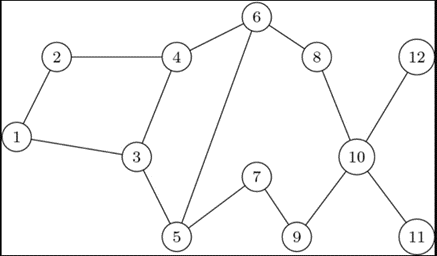

This graph's 12 vertices and 14 edges are shown in the diagram above.  

<h2>Graph Isomorphism Problem Definition</h2>
Graphs can be isomorphic when the number of vertices and edges are similar, or They maintain their edge connectivity.

Deciding whether two graphs are identical, or isomorphic, is a classical algorithmic problem that has been studied since the early days of computing. Applications can be found in many various fields, such as computer vision and chemistry.

The computational challenge of finding out if two finite graphs are isomorphic is known as the graph isomorphism problem. The problem appears to have no polynomial-time solution and to be NP-complete, putting it in the category of computational complexity known as NP-intermediate. The graph isomorphism problem is in the low hierarchy of class NP, which means it is not NP-complete unless the polynomial time hierarchy falls to its second level.

Isomorphism can be a mapping which includes inverse mapping. There is also a description of equivalence. A couple of vertices linked by edges are adjacent. In the context of graph, a bijection maintains an adjacent that is referred by isomorphism. A bijection maps from one to the other and from the other back to the one. A well organized graph isomorphism algorithm could make an impact on fields like pattern recognition, computer vision and matching. 


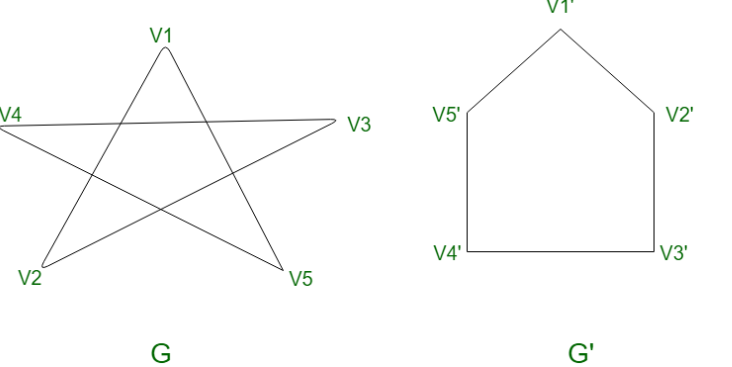

The image above is an example of two graphs that are isomorphic. The graphical order of the vertices and edges makes them look very different, but they are the same graph.

## Complexity classes
In the theory of computational complexity, Complexity classes get defined with granular sets of complexity classes called DTIME, NTIME, DSPACE and NSPACE using big O notion. These computational problems are used for time complexity and space complexity. Polynomial time and NP are two complexity classes for time and space complexity. The Graph Ismorphism problem is known to be a NP problem.

Since the graph isomorphism problem is neither in the class polynomial nor NP-complete, it is considered NP-intermediate. An NP-intermediate problem is in NP ("yes" answers are verified in polynomial time). It is not in polynomial, no polynomial-time algorithm can solve the problem. It is also not NP complete.

It is a clear difference between the class of problems that are efficiently solvable and the class of problems whose solutions are merely efficiently checkable, polynomial and NP are actually at the center of one of the most popular unsolved problems in computer science. polynomial is a subset of NP, but it is not known whether NP is strictly larger than polynomial. polynomial problems are usually fast for a computer to solve. NP problems are also quick and simple to allow computer to check, but they are difficult to solve.

In the event that P = NP, the nondeterminism give no additional computational power over determinism with regards to the ability to quickly find a solution to a problem. Furthermore, it would follow that if there exists a proof for a problem instance and that proof can be quickly be checked for correctness (that is, if the problem is in NP).

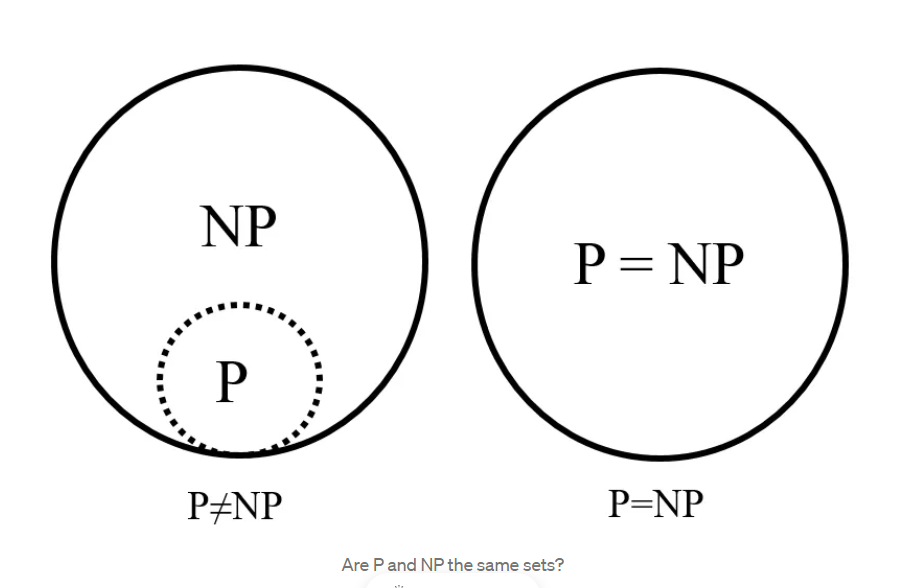

People wonder if everything in NP would turn out to be in P or if there were NP problems that were really harder than the ones in P.


## Implementation of the Graph Isomorphism
There are various algorithms to solve graph isomorphism problem. However, there are no efficient algorithms known. We know graph isomorphism problem ask whether two given graphs are isomorphic. The code below is a simple implementation of the graph isomorphism problem in Python using the NetworkX library

In [1]:
import networkx as nx

def is_isomorphic(graph1, graph2):
    # lets see if the two adjacency matrices graph1 and graph2 will be isomorphic graphs
    if len(graph1) != len(graph2):
        return false

    # check all node mappings
    for perm in nx.algorithms.isomorphism.faster_could_be_isomorphic(graph1, graph2):
        if nx.is_isomorphic(graph1, graph2, node_match=lambda node1, node2: node1['blue'] == node2['blue'], edge_match=lambda edge1, edge2: edge1['weight'] == edge2['weight']):
            return true

    return false


The graph isomorphism implementation above use a NetworkX library to create possible node mappings between two graphs, and the try each one for isomorphism using "is_isomorphic" function. The "node_match" and "edge_match" parameters get certain node and edge attribute matching methods. 

We must know this graph isomorphism implementation is not efficient for big graphs, as it tries every node mapping. It can still be good for small graphs.

The code below implementation of graph isomorphism with NumPy and itertools library:

In [5]:
import numpy as np
import itertools

def is_isomorphic(graph1, graph2):
    # lets see if the two adjacency matrices graph1 and graph2 will be isomorphic graphs
    n, m = graph1.shape
    if (n, m) != graph2.shape:
        return False
    
    # check all permutations of nodes
    for perm in itertools.permutations(range(n)):
        P = np.zeros((n, n))
        for i, j in enumerate(perm):
            P[i, j] = 1
        if np.array_equal(P @ graph1 @ P.T, graph2):
            return True
    
    return False


The implementation above has two adjacency matrices graph1 and graph2 and checks to see if they are isomorphic graphs. The shape attribute of NumPy arrays make sure the matrices have similar dimensions.

Matplotlib is mainly a Python visualization library. It is not often used for graph isomorphism. However, it is able to visualize graphs with isomorphisms with Matplotlib.

This code below uses Python to create two graphs with NetworkX, visualizes them with Matplotlib, and then make a decesion to see if they are isomorphic or not.

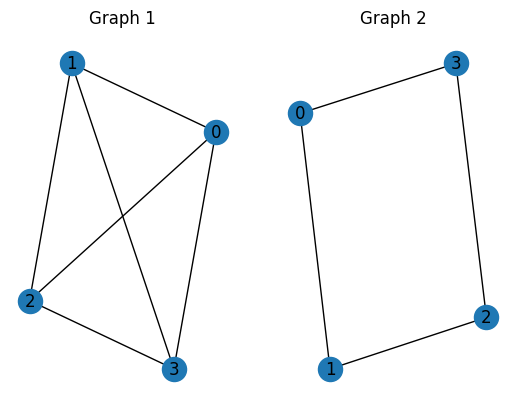

These Graphs aren't isomorphic


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def is_isomorphic(graph1, graph2):
    # lets see whether the number of nodes and edges are similar
    if graph1.number_of_nodes() != graph2.number_of_nodes() or graph1.number_of_edges() != graph2.number_of_edges():
        return False

    # lets see whether the degree sequence of each node is the similar
    degree_seq1 = sorted(list(dict(graph1.degree()).values()))
    degree_seq2 = sorted(list(dict(graph2.degree()).values()))
    if degree_seq1 != degree_seq2:
        return False

    # lets see whether the adjacency matrix of each graph is the similar
    adj_mat1 = nx.adjacency_matrix(graph1).todense()
    adj_mat2 = nx.adjacency_matrix(graph2).todense()
    for perm in permutations(range(adj_mat1.shape[0])):
        perm_mat = np.zeros_like(adj_mat1)
        for i, j in enumerate(perm):
            perm_mat[i, j] = 1

        if np.array_equal(perm_mat @ adj_mat1 @ perm_mat.T, adj_mat2):
            return True

    return False

# create two graphs
graph1 = nx.complete_graph(4)
graph2 = nx.Graph([(1, 0), (1, 2), (3, 2), (0, 3)])

# Visualize the two graphs
plt.subplot(121)
nx.draw(graph1, with_labels=True)
plt.title("Graph 1")
plt.subplot(122)
nx.draw(graph2, with_labels=True)
plt.title("Graph 2")
plt.show()

# lets see wether the graphs will be isomorphic or not
if is_isomorphic(graph1, graph2):
    print("These Graphs are isomorphic")
else:
    print("These Graphs aren't isomorphic")


The code above, defines a method called is_isomorphic that uses two graphs and returns true if they are isomorphic or false if they are not isomorphic. The method examines whether the number of nodes and edges are the similar in both graphs. It will examine the degree sequence of each node to see if they are similar. Lastly, it takes the adjacency matrices of the two graphs to inspect if they can be isomorphic, as they use the permutations of nodes.

 The next step is to create two graphs with NetworkX tools. The first graph is a complete graph on four nodes, and the second graph is a cycle on four nodes. We must visualize two graphs side by side with Matplotlib's subplot and show functions.

In the end, the is_isomorphic method checks whether the two graphs will be isomorphic, and output the result. In this case, the graphs will not isomorphic because the first graph is complete while the second graph is incomplete.

## Graph representations

We need to remember, a graph is a data structure that has a collection of vertices (also called nodes) and edges that links the nodes. Graphs have serveral representations in computer science. Here are two common graph representation: 

1. Adjacency matrix
2. Adjacency list

Here is an example of an undirected graph below. 

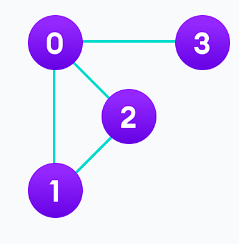

Other graph reprsentation includes:

1. Edge list
2. Incidence matrix
3. Incidence List

## Adjacency Matrix

An adjacency matrix is a square matrix for representing a graph. The elements of the matrix are usually Boolean values (0's and 1's), shows whether a directed path exists between any two vertices. If the graph is undirected, the matrix elemenets are the same. The graph is not same when it is a directed graph. 

Here is how the above undirected graph is represented in matrix form below:

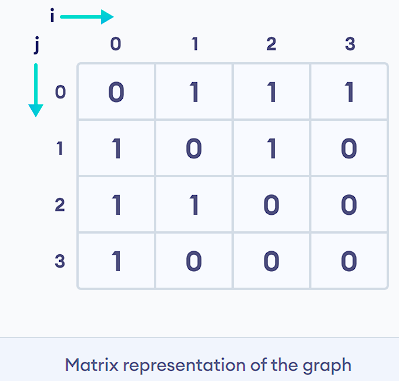


Adjacency Matrix is a 2D array with the size V x V. The V is the number of vertices in a graph. The 2D array is adj[i][j] = 1. This shows that there is an edge from vertex i and vertex j. The 2D array of adj[i][j] = w is used by adjacency matrix to represent weighted graphs. It shows there is an edge from vertex i to vertex j with weight w. When graph is undirected, there is an edge from vertex i  to vertex j and vice versa. We assign adj[i][j] = 1  and adj[j][i] = 1 in code. When graph is undirected, there is an edge from vertex i to vertex j then we have to assign adj[i][j]=1. 




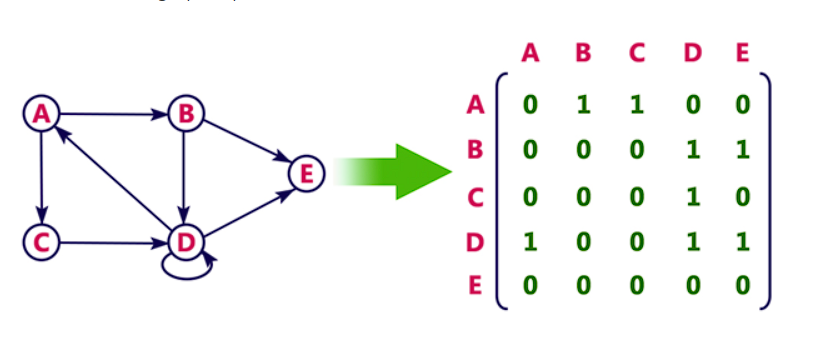

The above example is a directed graph, 1 represents an edge from row vertex to column vertex, and 0 represents no edge from row vertex to column vertex.

## Advantages of Adjacency Matrix 

Adjacency matrix is a popular graph representation. There are many positives about adjacency matrix:

1. It is easy to implement represensation. It is very quick to removes edges. It takes O(1) time. Checking if there is an edge from vertex i to vertex j are time efficient.

2. Perform expensive matrix operations on the GPU.

3. We get to understand the nature of the graph and the relationship with vertices.

4. We get easy to access information about the edges of the graph.

## Disadvantages of Adjaceny Matrix

Here are some examples of the disadvantages of adjaceny matrix:

1. Consumes alot of space.

2. Operations like inEdges and outEdges can be expensive when using the adjacency matrix representation.

## Code implementation of adjacency matrix



In [3]:
# Adjacency Matrix representation in Python


class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val)),
            print


def main():
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(2, 3)

    g.print_matrix()


if __name__ == '__main__':
    main()

   0
   1
   1
   0
   0
   1
   0
   1
   0
   0
   1
   1
   0
   1
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0


The following code uses a graph using an adjacency matrix: add_vertex(v) adds new vertex v to the graph, and add_edge(v1, v2, e) adds an edge with weight e between vertices v1 and v2.

In [13]:
# Add a vertex to the set of vertices and the graph
def add_vertex(v):
  global graph
  global vertices_no
  global vertices
  if v in vertices:
    print("Vertex ", v, " already exists")
  else:
    vertices_no = vertices_no + 1
    vertices.append(v)
    if vertices_no > 1:
        for vertex in graph:
            vertex.append(0)
    temp = []
    for i in range(vertices_no):
        temp.append(0)
    graph.append(temp)

# Add an edge between vertex v1 and v2 with edge weight e
def add_edge(v1, v2, e):
    global graph
    global vertices_no
    global vertices
    # Check if vertex v1 is a valid vertex
    if v1 not in vertices:
        print("Vertex ", v1, " does not exist.")
    # Check if vertex v1 is a valid vertex
    elif v2 not in vertices:
        print("Vertex ", v2, " does not exist.")
    # Since this code is not restricted to a directed or 
    # an undirected graph, an edge between v1 v2 does not
    # imply that an edge exists between v2 and v1
    else:
        index1 = vertices.index(v1)
        index2 = vertices.index(v2)
        graph[index1][index2] = e

# Print the graph
def print_graph():
  global graph
  global vertices_no
  for i in range(vertices_no):
    for j in range(vertices_no):
      if graph[i][j] != 0:
        print(vertices[i], " -> ", vertices[j], \
        " edge weight: ", graph[i][j])

# Driver code        
# stores the vertices in the graph
vertices = []
# stores the number of vertices in the graph
vertices_no = 0
graph = []
# Add vertices to the graph
add_vertex(1)
add_vertex(2)
add_vertex(3)
add_vertex(4)
# Add the edges between the vertices by specifying
# the from and to vertex along with the edge weights.
add_edge(1, 2, 1)
add_edge(1, 3, 1)
add_edge(2, 3, 3)
add_edge(3, 4, 4)
add_edge(4, 1, 5)
print_graph()
print("Internal representation: ", graph)

1  ->  2  edge weight:  1
1  ->  3  edge weight:  1
2  ->  3  edge weight:  3
3  ->  4  edge weight:  4
4  ->  1  edge weight:  5
Internal representation:  [[0, 1, 1, 0], [0, 0, 3, 0], [0, 0, 0, 4], [5, 0, 0, 0]]


## Adjacency List

In graph theory, adjacency list is a linked representation. The index of the array describes a vertex and each element in its linked list represents the other vertices that form an edge with the vertex. In other words, an adjacency list stores which vertices are adjacent to each other in a graph.

Let's see the following graph representation implemented using linked list:

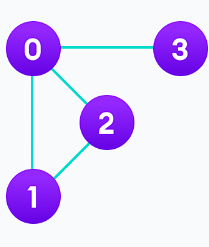               


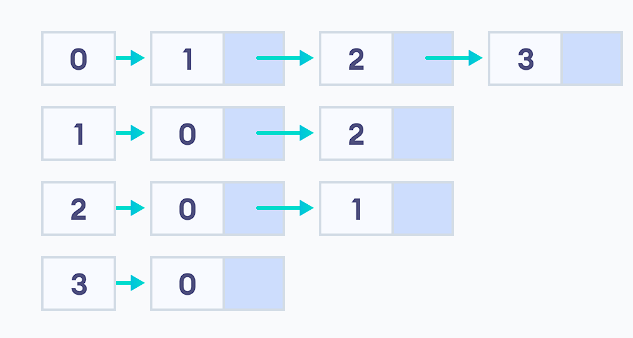

 The 0, 1, 2 and 3 are the vertices and each of them forms a linked list with all of its adjacent vertices. As you can see, vertex 1 has two adjacent vertices 0 and 2. Therefore, 1 is linked with 0 and 2 in the image above.

 ## Advantages of Adjacency List
 Hera are some examples of the advantages of using the adjacency list representation for a graph:

 1. An adjacency list is very efficient for storage because we only need to store the values for the edges. A sparse graph with millions of vertices and edges, there can be a lot of saved space.

 2. It can easily detect all the vertices adjacent to a vertex.

 3. Supports directed and undirected graphs

 ## Disadvantages  of Adjacency List

 Hera are some examples of the disadvantages of using the adjacency list representation for a graph:

 1. Adjacency List is slower for finding than adjacent matrix because the linked nodes must be inspected to them.

 2. Inefficient for certain operations, such as deciding the presence of a certain edge or counting the number of edges in the graph.
 


## Adjacency List Code Implentation

In [1]:
# Adjascency List representation in Python


class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None


class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node

        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


if __name__ == "__main__":
    V = 5

    # Create graph and edges
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 2)
    graph.add_edge(0, 3)
    graph.add_edge(1, 2)

    graph.print_agraph()

Vertex 0: -> 3 -> 2 -> 1 

Vertex 1: -> 2 -> 0 

Vertex 2: -> 1 -> 0 

Vertex 3: -> 0 

Vertex 4: 



The following code uses a graph using an adjacency list: add_vertex(v) adds new vertex v to the graph, and add_edge(v1, v2, e) adds an edge with weight e between vertices v1 and v2.

In [12]:
# Add a vertex to the dictionary
def add_vertex(v):
  global graph
  global vertices_no
  if v in graph:
    print("Vertex ", v, " already exists.")
  else:
    vertices_no = vertices_no + 1
    graph[v] = []

# Add an edge between vertex v1 and v2 with edge weight e
def add_edge(v1, v2, e):
  global graph
  # Check if vertex v1 is a valid vertex
  if v1 not in graph:
    print("Vertex ", v1, " does not exist.")
  # Check if vertex v2 is a valid vertex
  elif v2 not in graph:
    print("Vertex ", v2, " does not exist.")
  else:
    # Since this code is not restricted to a directed or 
    # an undirected graph, an edge between v1 v2 does not
    # imply that an edge exists between v2 and v1
    temp = [v2, e]
    graph[v1].append(temp)

# Print the graph
def print_graph():
  global graph
  for vertex in graph:
    for edges in graph[vertex]:
      print(vertex, " -> ", edges[0], " edge weight: ", edges[1])

# driver code
graph = {}
# stores the number of vertices in the graph
vertices_no = 0
add_vertex(1)
add_vertex(2)
add_vertex(3)
add_vertex(4)
# Add the edges between the vertices by specifying
# the from and to vertex along with the edge weights.
add_edge(1, 2, 1)
add_edge(1, 3, 1)
add_edge(2, 3, 3)
add_edge(3, 4, 4)
add_edge(4, 1, 5)
print_graph()
# Reminder: the second element of each list inside the dictionary
# denotes the edge weight.
print ("Internal representation: ", graph)

1  ->  2  edge weight:  1
1  ->  3  edge weight:  1
2  ->  3  edge weight:  3
3  ->  4  edge weight:  4
4  ->  1  edge weight:  5
Internal representation:  {1: [[2, 1], [3, 1]], 2: [[3, 3]], 3: [[4, 4]], 4: [[1, 5]]}


<h2>References</h2>
https://www.tutorialspoint.com/graph_theory/graph_theory_introduction.htm 

https://www.researchgate.net/figure/A-graph-G-on-12-vertices-and-14-edges_fig3_340856393 

https://www.tutorialspoint.com/graph_theory/graph_theory_isomorphism.htm

https://en.wikipedia.org/wiki/Graph_isomorphism_problem

https://cacm.acm.org/magazines/2020/11/248220-the-graph-isomorphism-problem/abstract

https://www.geeksforgeeks.org/mathematics-graph-isomorphisms-connectivity/

https://en.wikipedia.org/wiki/Complexity_class

https://medium.com/@bilalaamir/p-vs-np-problem-in-a-nutshell-dbf08133bec5

https://stackoverflow.com/questions/40773886/what-are-np-intermediate-problems/40773945#40773945

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.is_isomorphic.html

https://www.w3schools.com/python/numpy/default.asp

http://users.cecs.anu.edu.au/~bdm/papers/pgi.pdf

https://docs.python.org/3/library/itertools.html

https://matplotlib.org/stable/tutorials/index.html

https://networkx.org/documentation/networkx-1.9.1/_downloads/networkx_tutorial.pdf

https://en.wikipedia.org/wiki/File:Undirected_graph.svg

https://www.programiz.com/dsa/graph-adjacency-matrix

https://www.geeksforgeeks.org/graph-and-its-representations/

https://www.javatpoint.com/graph-theory-graph-representations#:~:text=In%20graph%20theory%2C%20a%20graph,to%20it%20by%20an%20edge).

https://www.programiz.com/dsa/graph-adjacency-list

https://www.educative.io/answers/how-to-implement-a-graph-in-python